In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' #omit info 
from learnMSA.msa_hmm import Configuration, Align, Visualize
from learnMSA.msa_hmm.SequenceDataset import SequenceDataset

2024-10-24 14:27:05.332503: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-24 14:27:05.343252: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-24 14:27:05.346584: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1729780026.795937  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780026.824125  101454 cuda_executor.cc:1015] succ

## learnMSA demo

In this notebook, we will fit a number of HMM models to a dataset of unaligned sequences. 
We will then use the fitted models to align the sequences and compare the results.
Moreover, we will visualize the best (according to an objective criterion) model and alignment.

*This notebook is meant to be a demo for running learnMSA in Python code. Check the readme if you want to run learnMSA from the command line.* 

Change the variables in the following cell to fit your needs.

In [2]:
# Your fasta file with unaligned sequences.

train_filename = "test/data/egf.fasta"

# Reference file with aligned sequences that have matching IDs to (potentially a subset of) the 
# sequences in the train_file.
# Replace with empty string if no reference is available.
ref_filename = "test/data/egf.ref"

# The number of independently trained models.
num_models = 10

# Use sequence weights based on a rapid pre-clustering of the sequences (requires mmseqs2 to be installed)
use_weights = True

# Align long insertions with an external aligner left unaligned by the main MSA stage (requires famsa to be installed).
align_insertions = True

## Run learnMSA from Python (Training + Viterbi alignment)

Training of 10 models on file egf.fasta
Configuration: 
{
num_models : 10
transitioner : ProfileHMMTransitioner(
 transition_init=
    {
    begin_to_match : DefaultEntry() , match_to_end : DefaultExit() , 
    match_to_match : DefaultMatchTransition(1) , match_to_insert : DefaultMatchTransition(-1) , 
    insert_to_match : Norm(0, 0.1) , insert_to_insert : Norm(-0.5, 0.1) , 
    match_to_delete : DefaultMatchTransition(-1) , delete_to_match : Norm(0, 0.1) , 
    delete_to_delete : Norm(-0.5, 0.1) , left_flank_loop : Norm(0, 0.1) , 
    left_flank_exit : Norm(-1, 0.1) , right_flank_loop : Norm(0, 0.1) , 
    right_flank_exit : Norm(-1, 0.1) , unannotated_segment_loop : Norm(0, 0.1) , 
    unannotated_segment_exit : Norm(-1, 0.1) , end_to_unannotated_segment : Norm(-9, 0.1) , 
    end_to_right_flank : Norm(0, 0.1) , end_to_terminal : Norm(0, 0.1)
    },
 flank_init=Const(0.0),
 prior=ProfileHMMTransitionPrior(match_comp=1, insert_comp=1, delete_comp=1, alpha_flank=7000, alpha_single=100

I0000 00:00:1729780040.435131  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780040.435410  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780040.435616  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780040.435832  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (<unknown>, line 18)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1/10


I0000 00:00:1729780045.169125  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780045.169368  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780045.169547  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780045.169763  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

34/34 - 42s - 1s/step - loss: 97.8050 - loglik: -8.3954e+01 - prior: -1.3851e+01 - aux_loss: 0.0000e+00
Epoch 2/10
34/34 - 4s - 117ms/step - loss: 69.9120 - loglik: -6.7878e+01 - prior: -2.0338e+00 - aux_loss: 0.0000e+00
Epoch 3/10
34/34 - 3s - 102ms/step - loss: 68.0411 - loglik: -6.6719e+01 - prior: -1.3218e+00 - aux_loss: 0.0000e+00
Epoch 4/10
34/34 - 3s - 102ms/step - loss: 67.7149 - loglik: -6.6579e+01 - prior: -1.1355e+00 - aux_loss: 0.0000e+00
Epoch 5/10
34/34 - 4s - 105ms/step - loss: 67.6273 - loglik: -6.6555e+01 - prior: -1.0726e+00 - aux_loss: 0.0000e+00
Epoch 6/10
34/34 - 4s - 106ms/step - loss: 67.3709 - loglik: -6.6353e+01 - prior: -1.0175e+00 - aux_loss: 0.0000e+00
Epoch 7/10
34/34 - 4s - 106ms/step - loss: 67.4648 - loglik: -6.6500e+01 - prior: -9.6510e-01 - aux_loss: 0.0000e+00
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (<unknown>, 

I0000 00:00:1729780112.393209  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780112.393491  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780112.393715  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780112.393970  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

expansions model 0: [(10, 1), (11, 2), (12, 2), (17, 1), (19, 2)]
discards model 0: []
expansions model 1: [(6, 1), (11, 2), (12, 2), (14, 1), (17, 1), (19, 2)]
discards model 1: []
expansions model 2: [(10, 1), (11, 9)]
discards model 2: []
expansions model 3: [(12, 2), (13, 2), (16, 1), (17, 1)]
discards model 3: []
expansions model 4: [(12, 2), (13, 3), (14, 2), (17, 1), (19, 2)]
discards model 4: []
expansions model 5: [(12, 2), (14, 2), (19, 1)]
discards model 5: []
expansions model 6: [(10, 1), (11, 2), (12, 3), (13, 1), (16, 1), (18, 2)]
discards model 6: []
expansions model 7: [(10, 1), (11, 2), (12, 3), (13, 1), (16, 1), (18, 2)]
discards model 7: []
expansions model 8: [(10, 1), (11, 4), (12, 2), (15, 1), (17, 2)]
discards model 8: []
expansions model 9: [(12, 2), (13, 2), (15, 1), (18, 1), (20, 2)]
discards model 9: []
Re-initialized the encoder parameters.
Fitting models of lengths [33, 34, 32, 32, 35, 33, 34, 34, 33, 34] on 7774 sequences.
Batch size= 256 Learning rate= 0.

I0000 00:00:1729780119.342144  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780119.342412  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780119.342595  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780119.342816  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Epoch 1/2


I0000 00:00:1729780123.611305  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780123.611607  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780123.611815  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780123.612050  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

34/34 - 44s - 1s/step - loss: 75.6254 - loglik: -6.3921e+01 - prior: -1.1704e+01 - aux_loss: 0.0000e+00
Epoch 2/2
34/34 - 4s - 106ms/step - loss: 64.4555 - loglik: -6.3212e+01 - prior: -1.2438e+00 - aux_loss: 0.0000e+00


I0000 00:00:1729780173.785019  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780173.785300  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780173.785513  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780173.785761  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

expansions model 0: []
discards model 0: [12 25]
expansions model 1: []
discards model 1: [12 16 26]
expansions model 2: []
discards model 2: [17]
expansions model 3: []
discards model 3: [12]
expansions model 4: []
discards model 4: [12 17 19 27]
expansions model 5: []
discards model 5: [12 16]
expansions model 6: []
discards model 6: [12 15 26]
expansions model 7: []
discards model 7: [12 18 26]
expansions model 8: []
discards model 8: [17 25]
expansions model 9: []
discards model 9: [12 15 26]
Re-initialized the encoder parameters.
Fitting models of lengths [31, 31, 31, 31, 31, 31, 31, 31, 31, 31] on 7774 sequences.
Batch size= 256 Learning rate= 0.1
Using sequence weights  [1.         0.33333334 0.07692308 ... 0.04347826 0.02777778 0.25      ] .
Using 1 GPUs.


I0000 00:00:1729780181.777024  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780181.777277  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780181.777462  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780181.777678  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Epoch 1/2


I0000 00:00:1729780185.940201  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780185.940463  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780185.940651  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780185.940871  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

34/34 - 41s - 1s/step - loss: 74.0393 - loglik: -6.2437e+01 - prior: -1.1602e+01 - aux_loss: 0.0000e+00
Epoch 2/2
34/34 - 3s - 100ms/step - loss: 63.9010 - loglik: -6.3033e+01 - prior: -8.6811e-01 - aux_loss: 0.0000e+00


I0000 00:00:1729780234.275641  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780234.275918  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780234.276098  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780234.276312  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

expansions model 0: []
discards model 0: []
expansions model 1: []
discards model 1: []
expansions model 2: []
discards model 2: []
expansions model 3: []
discards model 3: []
expansions model 4: []
discards model 4: []
expansions model 5: []
discards model 5: []
expansions model 6: []
discards model 6: []
expansions model 7: []
discards model 7: []
expansions model 8: []
discards model 8: []
expansions model 9: []
discards model 9: []
Re-initialized the encoder parameters.
Fitting models of lengths [31, 31, 31, 31, 31, 31, 31, 31, 31, 31] on 7774 sequences.
Batch size= 256 Learning rate= 0.1
Using sequence weights  [1.         0.33333334 0.07692308 ... 0.04347826 0.02777778 0.25      ] .
Using 1 GPUs.


I0000 00:00:1729780241.181460  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780241.181741  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780241.181926  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780241.182144  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Epoch 1/10


I0000 00:00:1729780245.379411  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780245.379694  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780245.379908  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780245.380154  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

34/34 - 41s - 1s/step - loss: 72.8350 - loglik: -6.2364e+01 - prior: -1.0471e+01 - aux_loss: 0.0000e+00
Epoch 2/10
34/34 - 3s - 101ms/step - loss: 63.5214 - loglik: -6.3121e+01 - prior: -3.9999e-01 - aux_loss: 0.0000e+00
Epoch 3/10
34/34 - 4s - 108ms/step - loss: 62.9084 - loglik: -6.3306e+01 - prior: 0.3976 - aux_loss: 0.0000e+00
Epoch 4/10
34/34 - 4s - 107ms/step - loss: 62.6255 - loglik: -6.3240e+01 - prior: 0.6147 - aux_loss: 0.0000e+00
Epoch 5/10
34/34 - 4s - 105ms/step - loss: 62.5218 - loglik: -6.3258e+01 - prior: 0.7367 - aux_loss: 0.0000e+00
Epoch 6/10
34/34 - 4s - 106ms/step - loss: 62.3099 - loglik: -6.3131e+01 - prior: 0.8209 - aux_loss: 0.0000e+00
Epoch 7/10
34/34 - 4s - 105ms/step - loss: 62.3923 - loglik: -6.3268e+01 - prior: 0.8753 - aux_loss: 0.0000e+00
Time for alignment: 270.3913
Likelihoods:  ['-58.8704', '-58.8962', '-58.8968', '-58.9630', '-58.8786', '-58.9055', '-58.9048', '-58.9626', '-59.0886', '-58.9589']
Mean likelihood:  -58.9325368792409
Selection criterion

I0000 00:00:1729780323.775368  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780323.775706  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780323.775925  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780323.776181  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Aligning 2 insertion slices with famsa.


/home/beckerf/mambaforge/envs/learnMSAdev2/lib/python3.12/site-packages/Bio/SeqRecord.py:228: BiopythonDeprecationWarning: Using a string as the sequence is deprecated and will raise a TypeError in future. It has been converted to a Seq object.
  warnings.warn(


time for generating output: 3.8784
Wrote file test/data/interactive.alignment.fasta
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 377ms/step
>l=-54.17_t=0.01
........$CD.......P........N............P.........CYN.HGT..C...S........L.....RA......................T......G..........YTCSCL..PR......Y......TGEH$.......................
>l=-55.00_t=0.01
........$CD.......S........Q............P.........CRN.-GT..C...Sl.......N.....TN......................T......D..........YTCACF..PG......Y......TGRY$.......................
>l=-49.86_t=0.01
........$CD.......S........D............P.........CLN.GGT..C...T........Lr....SL......................D......S..........YSCACA..PG......Y......TGQH$.......................
>l=-62.54_t=0.01
........$CD.......H........V............T.........CLN.GGT..C...Q........Lk....TL......................E......D..........YTCACA..NG......Y......TGER$.......................
>l=-63.14_t=0.01
........$CD.......H........V............T.........CLN.GGT..C...Q........Lk....TL.....................

/home/beckerf/mambaforge/envs/learnMSAdev2/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['sequences', 'indices']. Received: the structure of inputs=('*', '*')
  warnings.warn(
I0000 00:00:1729780344.679184  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780344.679448  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729780344.679650  101454 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but 

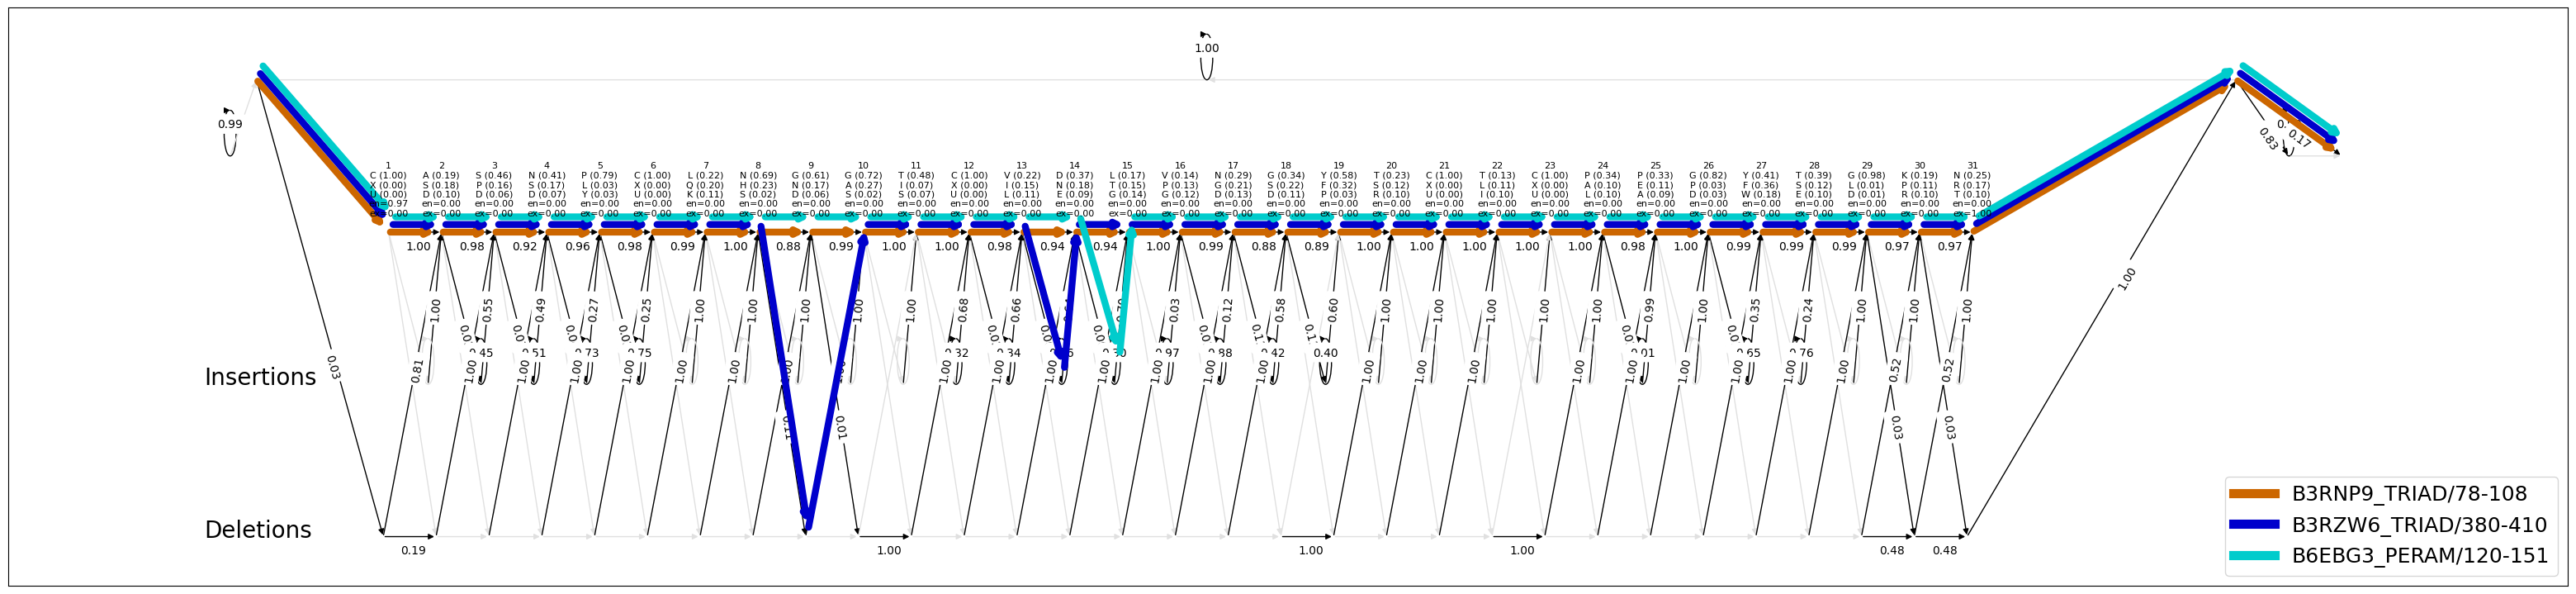

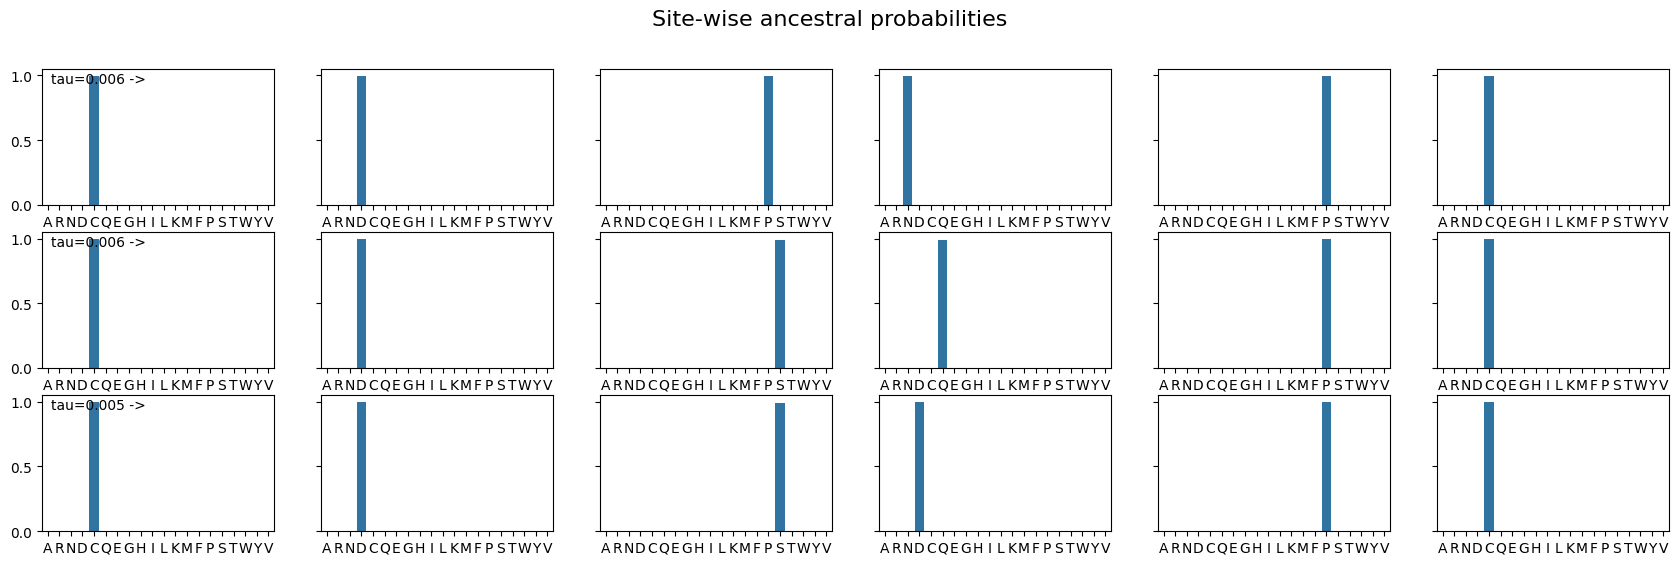

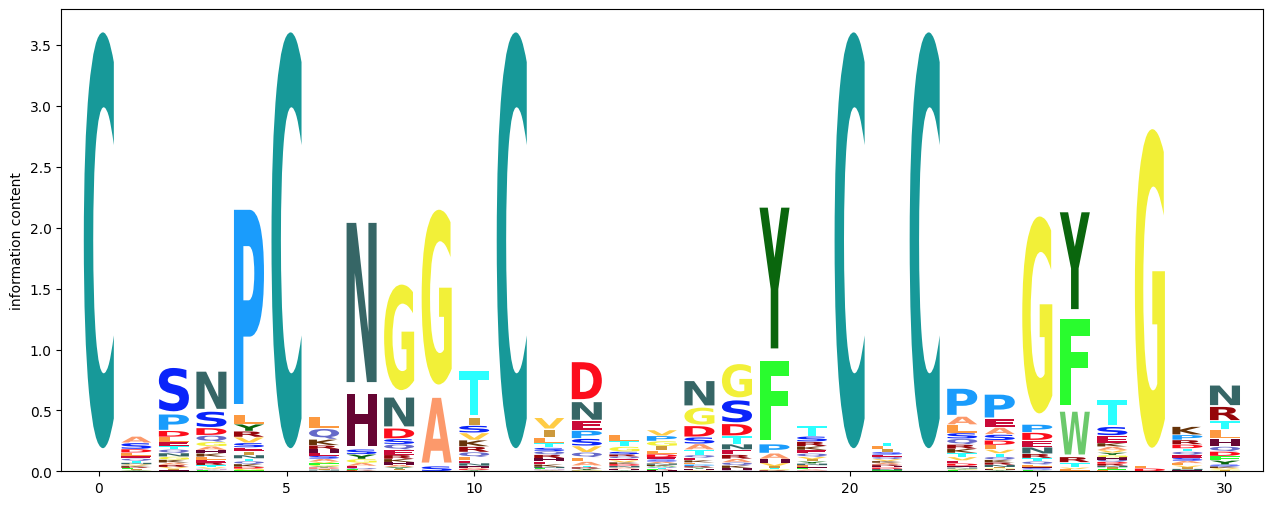

In [3]:
out_filename = "test/data/interactive.alignment.fasta"
config = Configuration.make_default(num_models)
#config["batch_size"] = 128
with SequenceDataset(train_filename, fmt="fasta") as data:
    alignment_model = Align.run_learnMSA(data,
                                        out_filename,
                                        config, 
                                        sequence_weights=Align.compute_sequence_weights(train_filename, "tmp") if use_weights else None,
                                        verbose=True,
                                        align_insertions=align_insertions)
    Visualize.print_and_plot(alignment_model, alignment_model.best_model)

In [6]:
!id_list=$(sed -n '/^>/p' {ref_filename} | sed 's/^.//') ; export MAX_N_PID_4_TCOFFEE=10000000 ; t_coffee -other_pg seq_reformat -in test/data/interactive.alignment.fasta -action +extract_seq_list ${{id_list[@]}} +rm_gap > test/data/interactive.projection.fasta

HERE: 1ixa
HERE: 1apo
HERE: 1urk
HERE: 1fsb
HERE: 1esl
HERE: 1hre
HERE: 1epi
HERE: 4tgf
HERE: 1hcgb
HERE: 1dan1
HERE: 1dan2
HERE: 1rfnb


In [7]:
!t_coffee -other_pg aln_compare -al1 {ref_filename} -al2 test/data/interactive.projection.fasta -compare_mode sp

*****************************************************
seq1       seq2          Sim   [ALL]           Tot  
egf           12         31.1    75.6 [100.0]   [ 5182]
